# Milestone 2

## Perkenalan

Nama: St. Syakirah

Batch : FTDS-016-RMT

Objectives : Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.

**Datset Descriptiom**

Dataset yang digunakan adalah dataset berisi informasi mengenai kampanye pemasaran suatu bank terhadaon customer. Dataset ini digunakan untuk menganalisis keberhasilan bank untuk membuat custumer memutuskan untuk berlanggan pada suatu program yang dipasarkan. Analisis ini berguna untuk menentukan peningkatan strategi pemasaran program berikutnya.

Feature | Description
---|---
age | person's age
job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
marital | marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
education | (categorical: primary, secondary, tertiary and unknown)
default| has credit in default? (categorical: 'no','yes','unknown')
housing| has housing loan? (categorical: 'no','yes','unknown')
loan| has personal loan? (categorical: 'no','yes','unknown')
balance| Balance of the individual.
contact| contact communication type (categorical: 'cellular','telephone')
month| last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
day| last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
duration| last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
campaign| number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays| number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous| number of contacts performed before this campaign and for this client (numeric)
poutcome| outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
y/deposit | has the client subscribed a term deposit? (binary: 'yes','no')

## Import Libaries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split

#Splitting train-test-set
from sklearn.model_selection import train_test_split

#Fiture Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

#Preprocessing scalling
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Preprocessing Encoding
from sklearn.preprocessing import OrdinalEncoder
#Fiture Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

#Training Model
#Logisticn Regression
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.svm import SVC
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier 
#Adaboost
from sklearn.ensemble import AdaBoostClassifier 
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Grid Search
from sklearn.model_selection import GridSearchCV
#Cross validation score
from sklearn.model_selection import cross_val_score
#calculate time
import timeit
#Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#Hyperparameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
# Evaluation model menggunakan metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Model Inference
import joblib
import json



## Data Loading

In [4]:
# Data loading
data = pd.read_csv('F:/Hacktiv8/Fase 1/Milestone 2/bank.csv')

In [3]:
#Menampilkan 5 data teratas
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#Menampilkan 5 data terakhir
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
#Copy dataset 
df = data.copy()

In [6]:
#Cek data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Statement:

- Data terdiri dari 11,1162 baris dan 17 kolom.
- Terdapat 7 kolom yang bertipe integer dan 10 kolom bertipe string.
- Tidak ditemukan adanya missing values pada dataset.

## Exploratory Data Analysis

**Analisis Deposit Customer**

Berapa persen custumer yang memutuskan untuk berlangganan pada suatu program yang dipasarkan oleh bank?

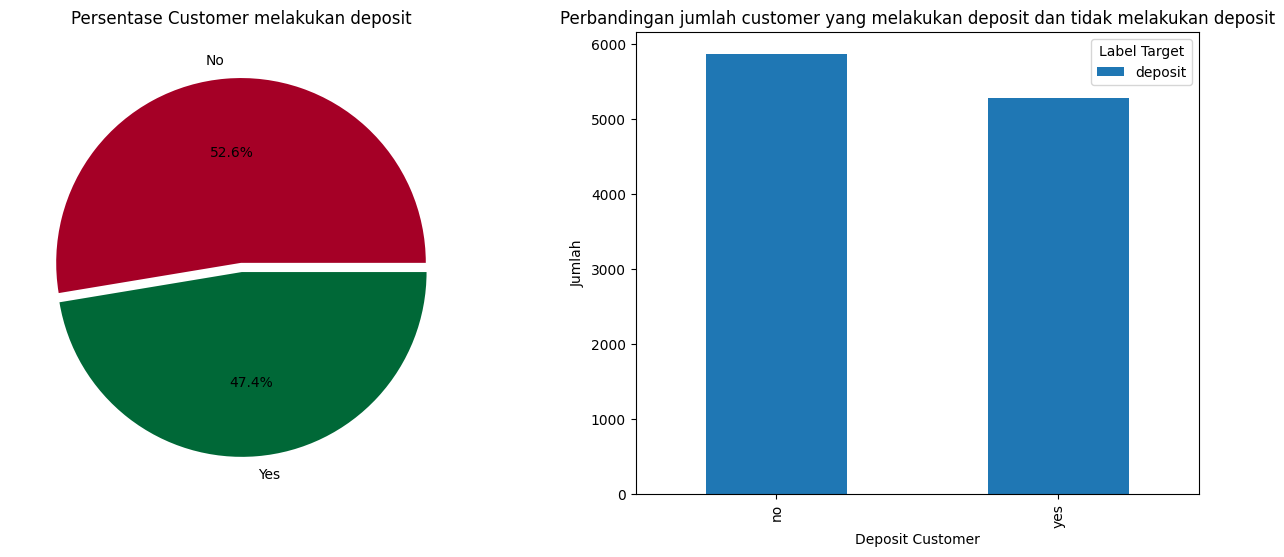

In [7]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
data['deposit'].value_counts().plot(
    kind='pie',
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    explode=[0,0.05],
    cmap='RdYlGn',
    ax=ax[0]
)
ax[0].set_title('Persentase Customer melakukan deposit')
ax[0].set_ylabel('')

#Barchart besaran setiap nilai pada kelas target
data.groupby('deposit').agg({'deposit':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Perbandingan jumlah customer yang melakukan deposit dan tidak melakukan deposit')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Deposit Customer')
ax[1].legend(title='Label Target')

Data deposit customer menunjukkan jumlah data customer yang melakukan deposit hampir seimbang dengan jumlah customer yang tidak melakukan deposit, meskipun jumlah customer yang tidak melakukan pembayaran deposit, namun selisihnya tidak jauh berbeda. Karena data target cukup seimbang/balance, kita tidak perlu melakukan resampling pada dataset. Jumlah custumer yang memutuskan untuk **berlanggangan** pada program bank berkisar 6000 customer atau sekitar 47,4%.

**Analisis Status Pernikahan Customer**

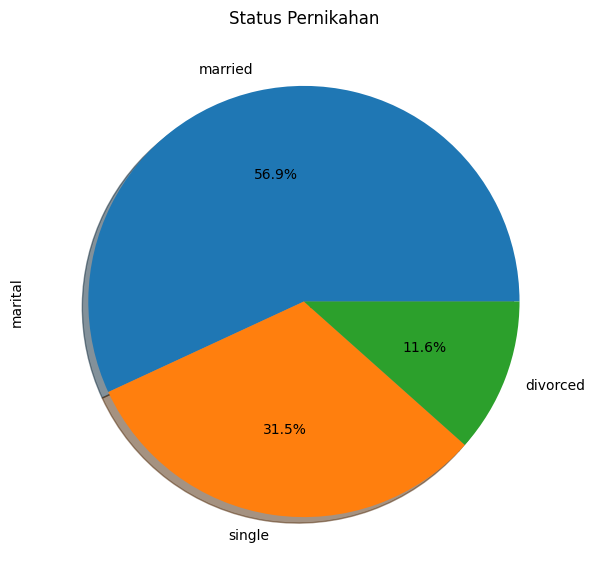

In [8]:
data['marital'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%' , shadow = True)
plt.title('Status Pernikahan')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Mayoritas customer suatu bank berstatus "married" dengan persentase sebesar 56,9%, setelah itu disusul dengan custumer yang berstaus tinggal dengan persentase 31,5% dan status divorced sebesar 11,6%.

**Analisis pekerjaan customer**

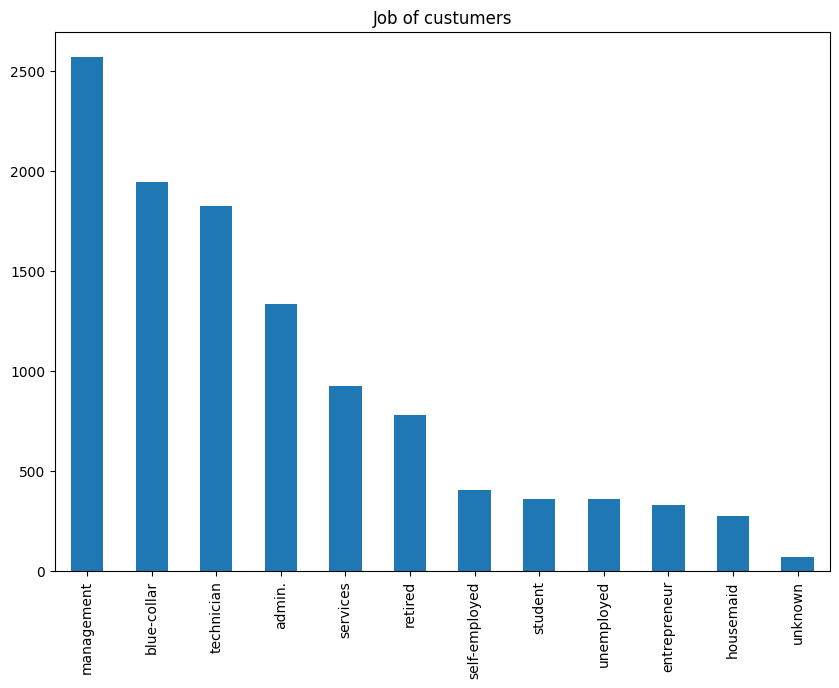

In [9]:
data['job'].value_counts().plot(kind = 'bar')
plt.title('Job of custumers')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

5 pekerjaan teratas customer dari bank ini adalah management, blue-collar, technician, admin dan services.

**Analisis Pendidikan Customer**

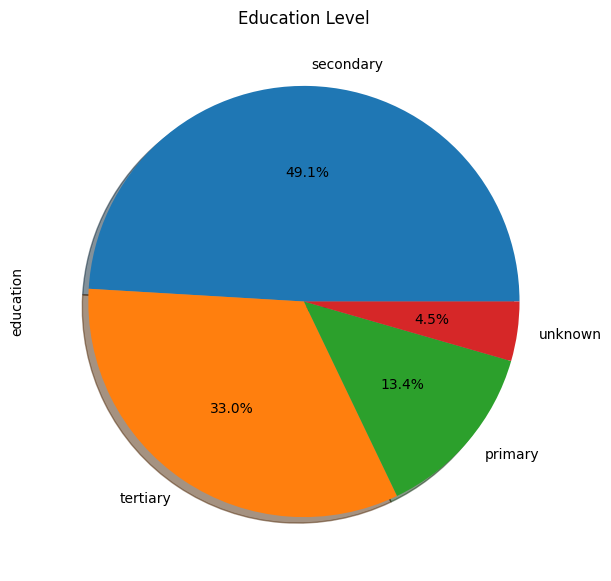

In [10]:
data['education'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%' , shadow = True)
plt.title('Education Level')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Kebanyakan custumer memiliki tingkat pendidikan 'secondary', kemudian, tertiary, primary, dan terakhir tidak diketahui.

**Analisis default vs deposit**

In [11]:
pd.crosstab(data.default, data.deposit)

deposit,no,yes
default,,
no,5757,5237
yes,116,52


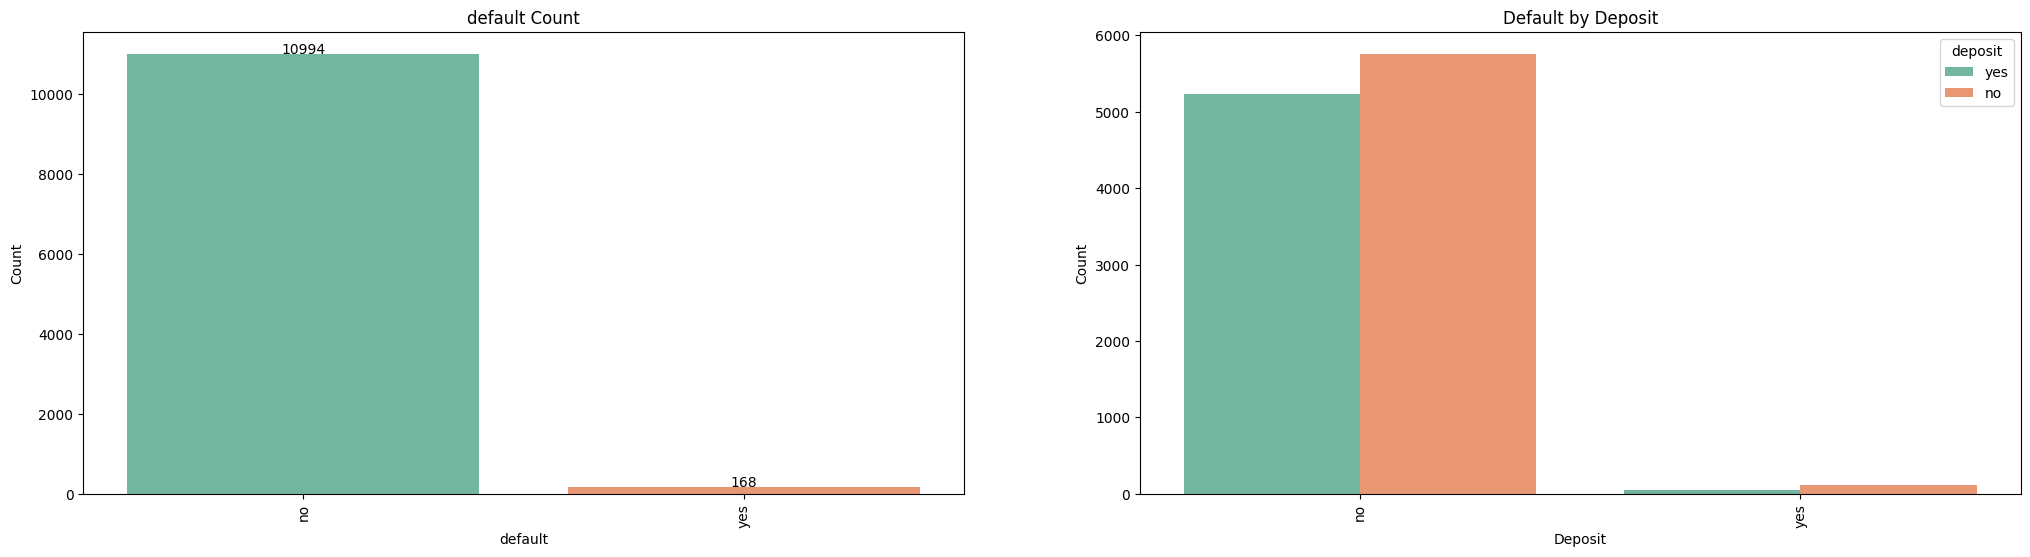

In [12]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='default', data=data, order=data.default.value_counts().index, palette='Set2')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('default Count')
plt.xlabel('default')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='default', data=data, order=data.default.value_counts().index, palette='Set2', hue='deposit')
plt.title('Default by Deposit')
plt.xlabel('Deposit')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Dataset menunjukkan bahwa mayoritas customer tidak memiliki riwayat default dalam membayar tagihan kartu kredit. Jumlah customer yang gagal bayar dan tidak gagal bayar jauh berbeda. Karena data defaultnya yg imbalance, sulit menentukan hubungan default dan deposit jika hanya dilihat dari jumlah customernya saja.

**Analisis Contact**

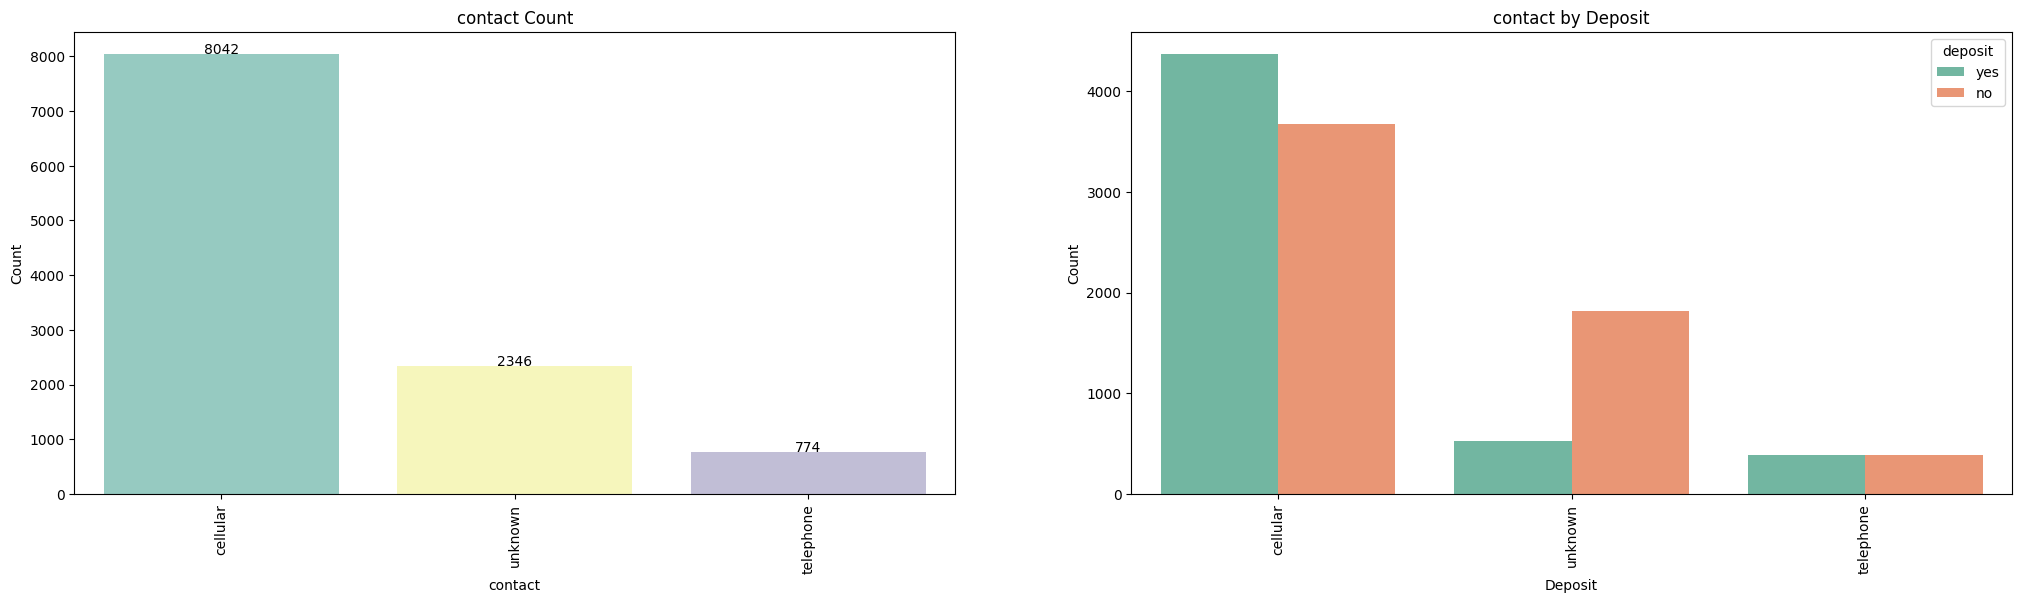

In [13]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='contact', data=data, order=data.contact.value_counts().index, palette='Set3')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('contact Count')
plt.xlabel('contact')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='contact', data=data, order=data.contact.value_counts().index, palette='Set2', hue='deposit')
plt.title('contact by Deposit')
plt.xlabel('Deposit')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [14]:
pd.crosstab(data.contact, data.deposit)

deposit,no,yes
contact,,
cellular,3673,4369
telephone,384,390
unknown,1816,530


- Perbandingan antara jumlah customer yang berlanggan program bank sama dengan jumlah customer yang tidak berlangganan berdasarkan contact melalui telephone.
- Custumer yang dihubungi lewat celullar lebih banyak memutuskan berlanggangan.
- Marketing melalui platform yang tidak diketahui, didominasi oleh customer yang tidak berlanggangan.

**Analisis hubungan cicilan rumah dan deposit**

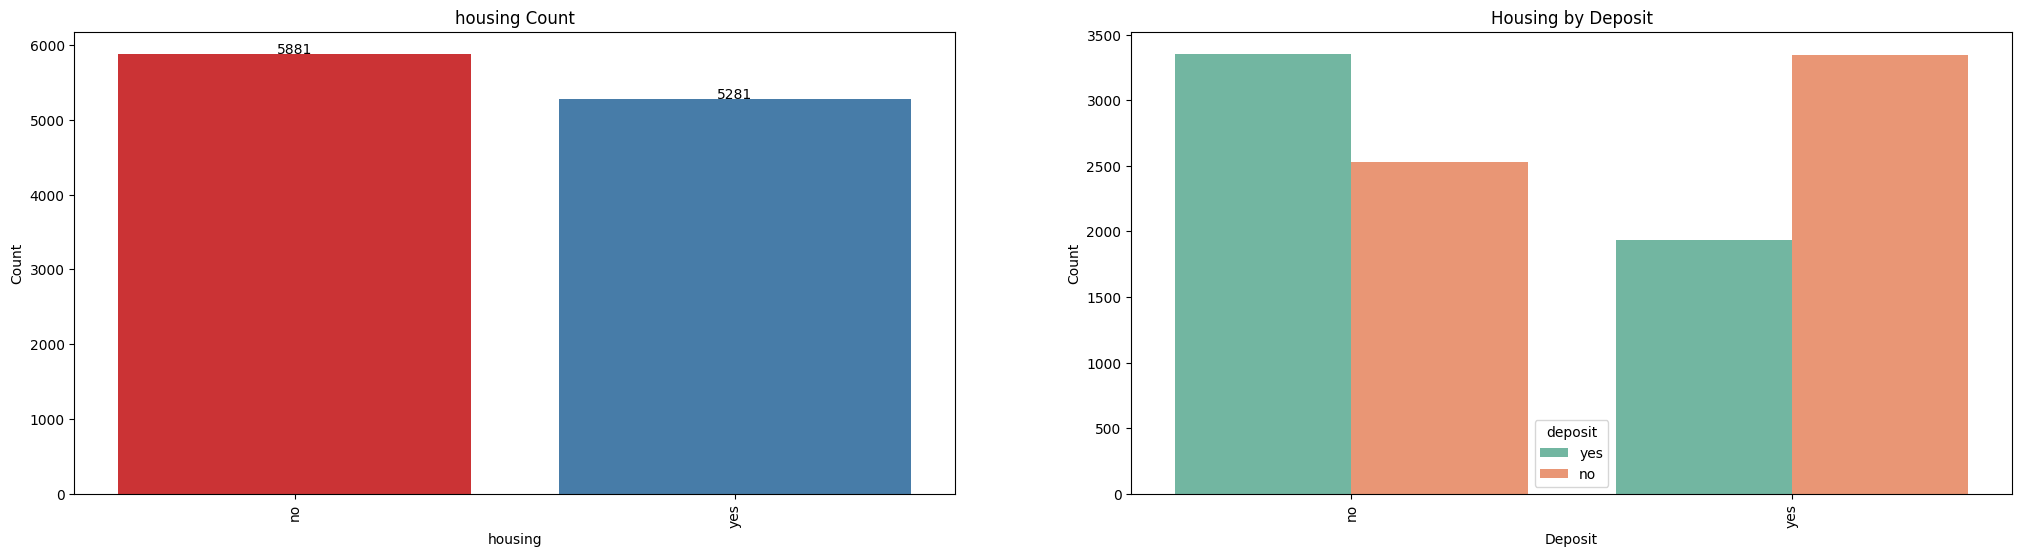

In [15]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='housing', data=data, order=data.housing.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('housing Count')
plt.xlabel('housing')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='housing', data=data, order=data.housing.value_counts().index, palette='Set2', hue='deposit')
plt.title('Housing by Deposit')
plt.xlabel('Deposit')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Seperti yang kita tahu data deposit cukup balanced dan data housing loan juga cukup balanced, sehingga lebih mudah untuk mengetahui hubungan antara housing dan deposit. Customer yang memiliki cicilan rumah cenderung tidak berlanggangan. Sedangkan, custumer yang tidak memiliki cicilan rumah cenderung akan melakukan deposit yang berarti customernya berlangganan. 

**Analisis Pinjaman Pribadi Customer**

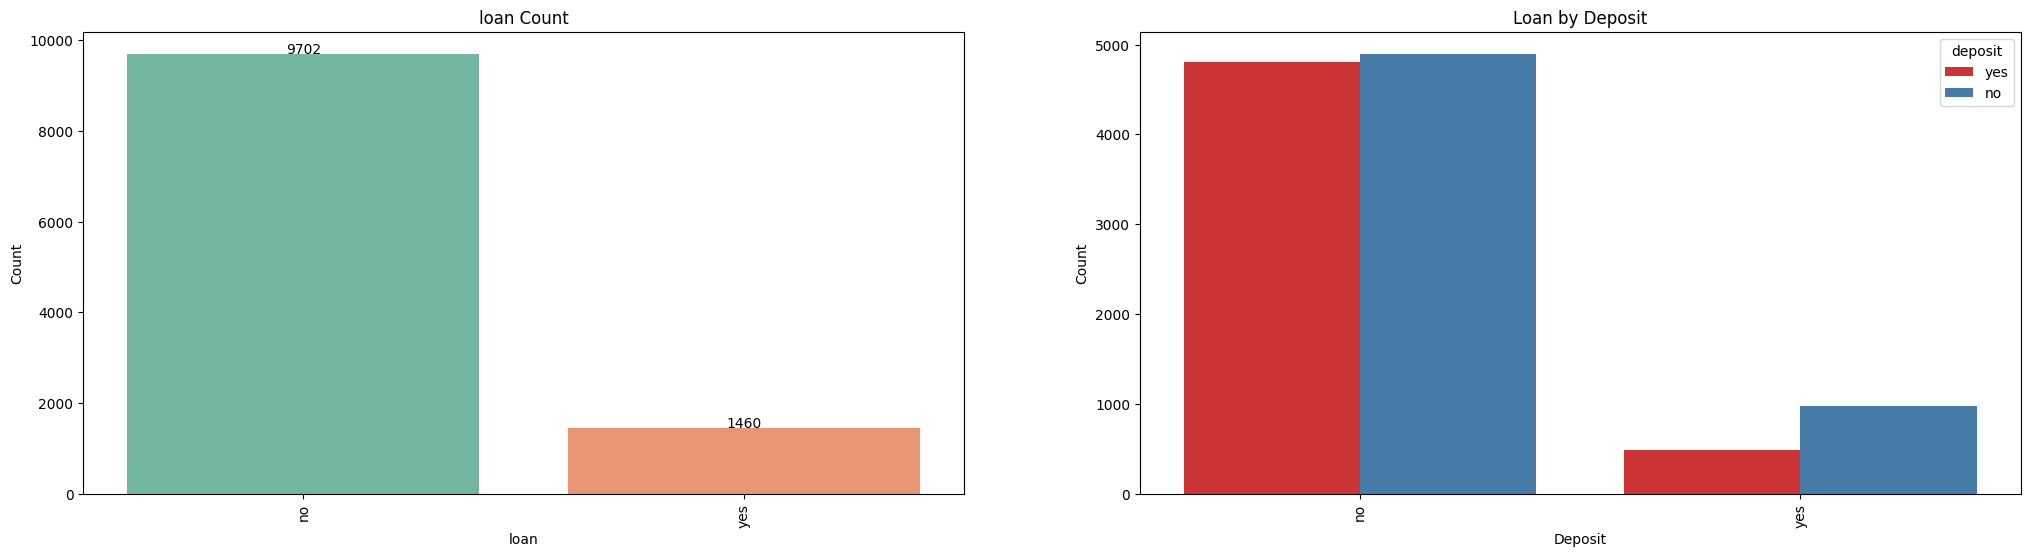

In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='loan', data=data, order=data.housing.value_counts().index, palette='Set2')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('loan Count')
plt.xlabel('loan')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='loan', data=data, order=data.housing.value_counts().index, palette='Set1', hue='deposit')
plt.title('Loan by Deposit')
plt.xlabel('Deposit')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

- Dataset menunjukkan customer didominasi oleh customer yang tidak memiliki pinjamana pribadi. Dataset juga menunjukkan ketidakseimbangan data pada kolom **loan**.
- Jumlah customer yang tidak memiliki pinjaman pribadi dan melakukan deposit hampir sama dengan jumlah customer yang tidak memiliki pinjaman pribadi dan tidak melakukan deposit.
- Jumlah customer yang tidak memiliki pinjaman pribadi dan melakukan deposit lebih sedikit dibanding custumer yang memiliki pinjaman pribadi dan tidak melakukan deposit.
- Sulit untuk menentukan hubungan deposit dan pinjaman pribadi jika hanya dilihat dari jumlah customer.

**Analisis usia customer yang melakukan deposit dan tidak melakukan deposit**

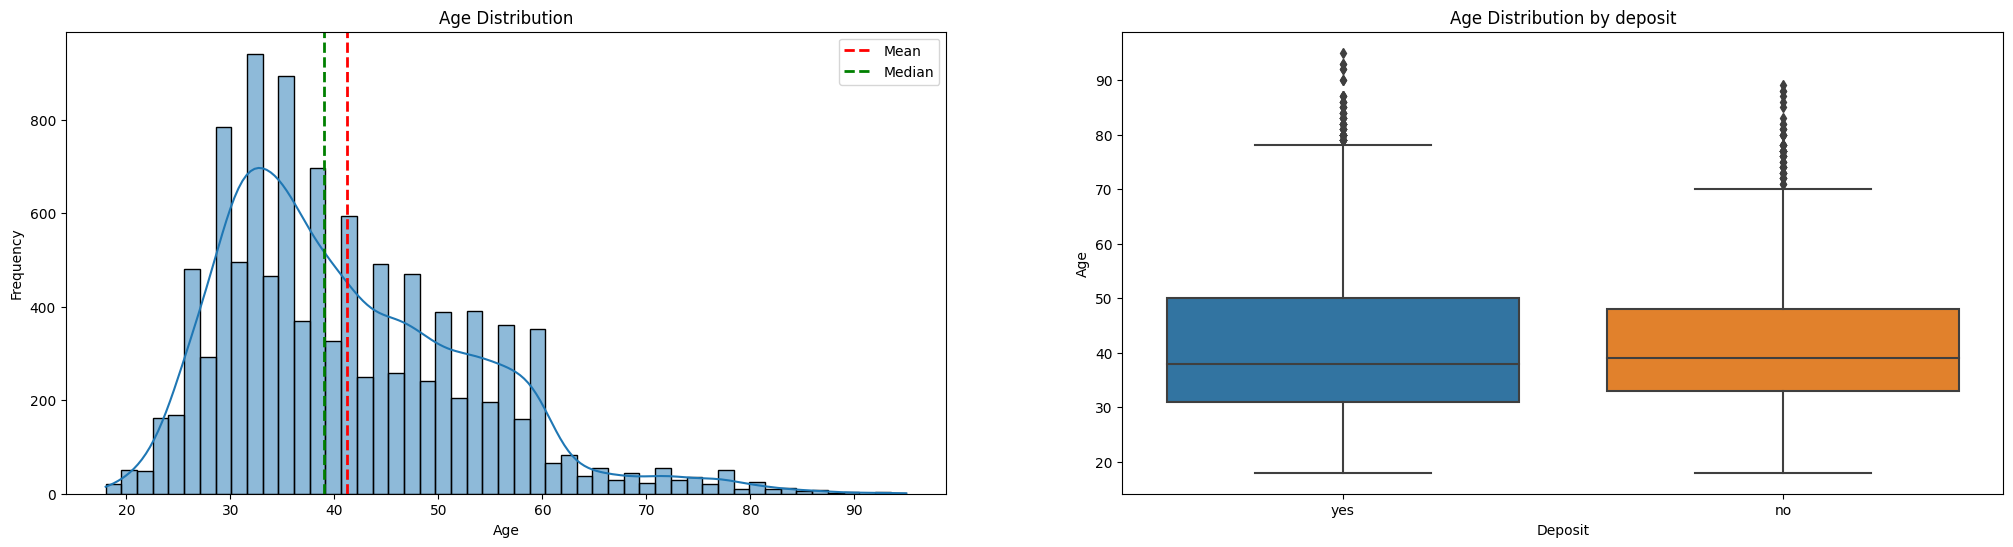

Skewness: 0.8627796373814871
Minumum Age: 18
Maximum Age: 95


In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=data, kde=True)
plt.axvline(data.age.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.age.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='deposit', y='age', data=data)
plt.title('Age Distribution by deposit')
plt.xlabel('Deposit')
plt.ylabel('Age')
plt.show()
print(f'Skewness: {data.age.skew()}')
print(f'Minumum Age: {data.age.min()}')
print(f'Maximum Age: {data.age.max()}')

- Mayoritas usia customer berkisar 25 hingga 60 tahun.
- Berdasarkan boxplot diatas, dapat diketahui distribusi jumlah customer yang **berlangganan** dan **tidak berlanggangan** **cukup seimbang** pada **usia 30 hingga 50 tahun**.  
- Usia customer memiliki distribusi yang skewed, hal ini disebabkan karena **high age** pada data. Customer yang memiliki usia tinggi akan terdeteksi sebagai outlier, namun tidak ada batasan terkait usia customer. Siapa saja dapat memiliki akun bank, tidak peduli berapapun usianya. Dengan demikian, kita tidak akan menghandle outlier dari usia customers.


**Analisis durasi dalam mengubungi custumer agar melakukan deposit** Berapa lama durasi karyawan bank dalam menjalankan marketing kepada customer?

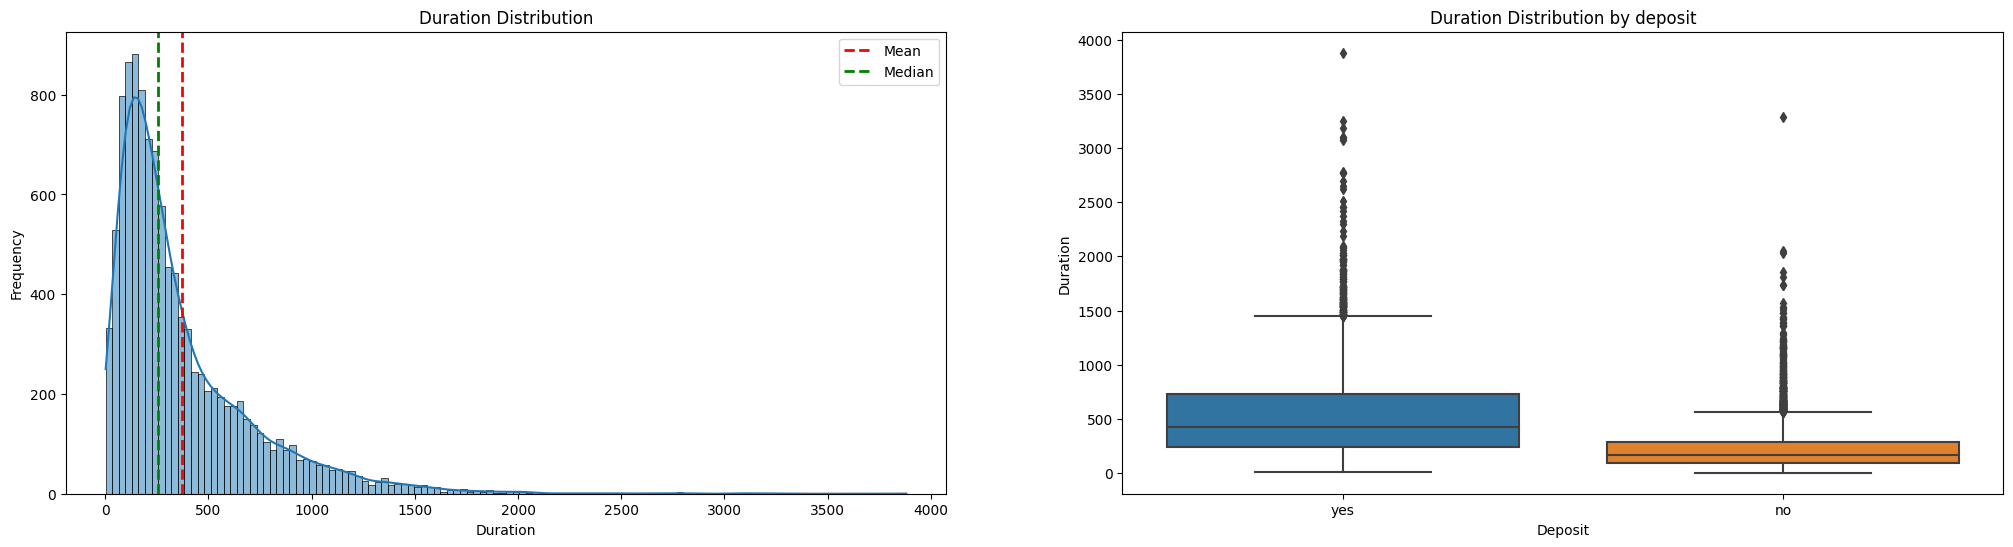

Skewness: 2.143694569993721
Minumum duration: 2
Maximum durarion: 3881


In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='duration', data=data, kde=True)
plt.axvline(data.duration.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.duration.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='deposit', y='duration', data=data)
plt.title('Duration Distribution by deposit')
plt.xlabel('Deposit')
plt.ylabel('Duration')
plt.show()
print(f'Skewness: {data.duration.skew()}')
print(f'Minumum duration: {data.duration.min()}')
print(f'Maximum durarion: {data.duration.max()}')

- Duration merupakan durasi yang dibutuhkan pihak bank menghubungi customer dalam satuan detik. Jika kita lihat hasil boxplot, dapat diketahui bahwa custumer yang memiliki durasi yang lama saat dihubungi oleh pihak bank cenderung akan melakukan deporit. Meskipun ada beberapa custumer yang durasinya lama tapi tidak melakukan deposit. 
- Umumnya customer yang **tidak** tertarik untuk **berlanggangan**, memiliki durasi yang **singkat** saat dihubungi oleh pihak bank.
- Rata" customer **tidak membutuhkan waktu yang lebih dari 500 detik** saat dihubungi oleh pihak bank. Durasi yang **lebih dari 500 detik** ini dideteksi sebagai **outlier** yang menyebabkan data **tidak terdistribusi normal**.
- Pada dasarnya, custumer yang membutuhkan durasi yang lebih lama itu wajar saja jika customer ingin mendapatkan informasi yang lebih dari pihak bank. Jadi, outlier distibusi tidak akan dihandle dan dianggap sebagai natural outlier.

**Analisis waktu yang dibutuhkan custumer untuk berlanggan**

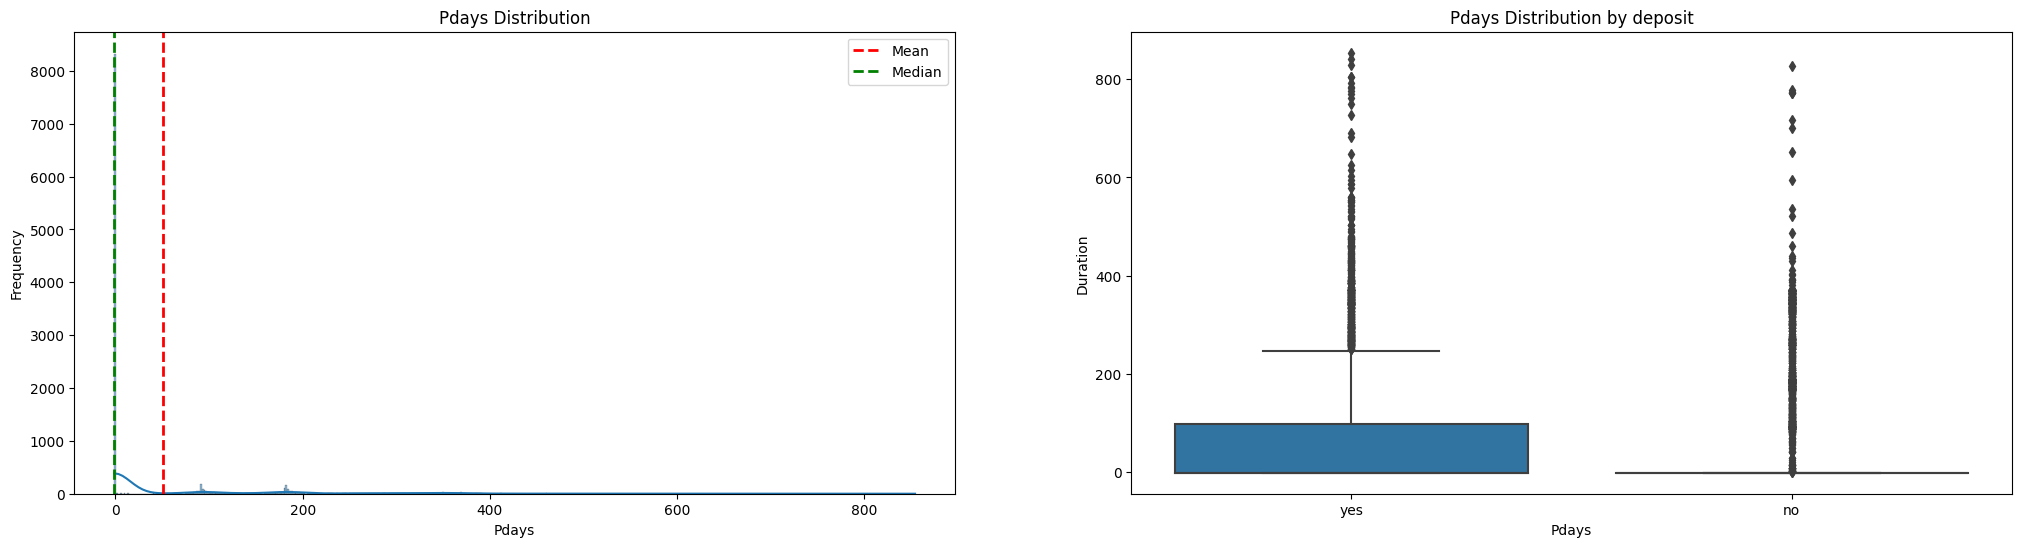

Skewness: 2.4499856341959547
Minumum pdays: -1
Maximum pdays: 854


In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pdays', data=data, kde=True)
plt.axvline(data.pdays.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pdays.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Pdays Distribution')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='deposit', y='pdays', data=data)
plt.title('Pdays Distribution by deposit')
plt.xlabel('Pdays')
plt.ylabel('Duration')
plt.show()
print(f'Skewness: {data.pdays.skew()}')
print(f'Minumum pdays: {data.pdays.min()}')
print(f'Maximum pdays: {data.pdays.max()}')

Rata" custumer memutuskan untuk berlangganan sejak dihubungi oleh pihak bank hingga sekitar 120 hari. Namun ada beberapa klien yang membutuhkan waktu lebih lama untuk berlanggangan. 

**Analisis subscribe deposit berdasarkan saldo custumer**

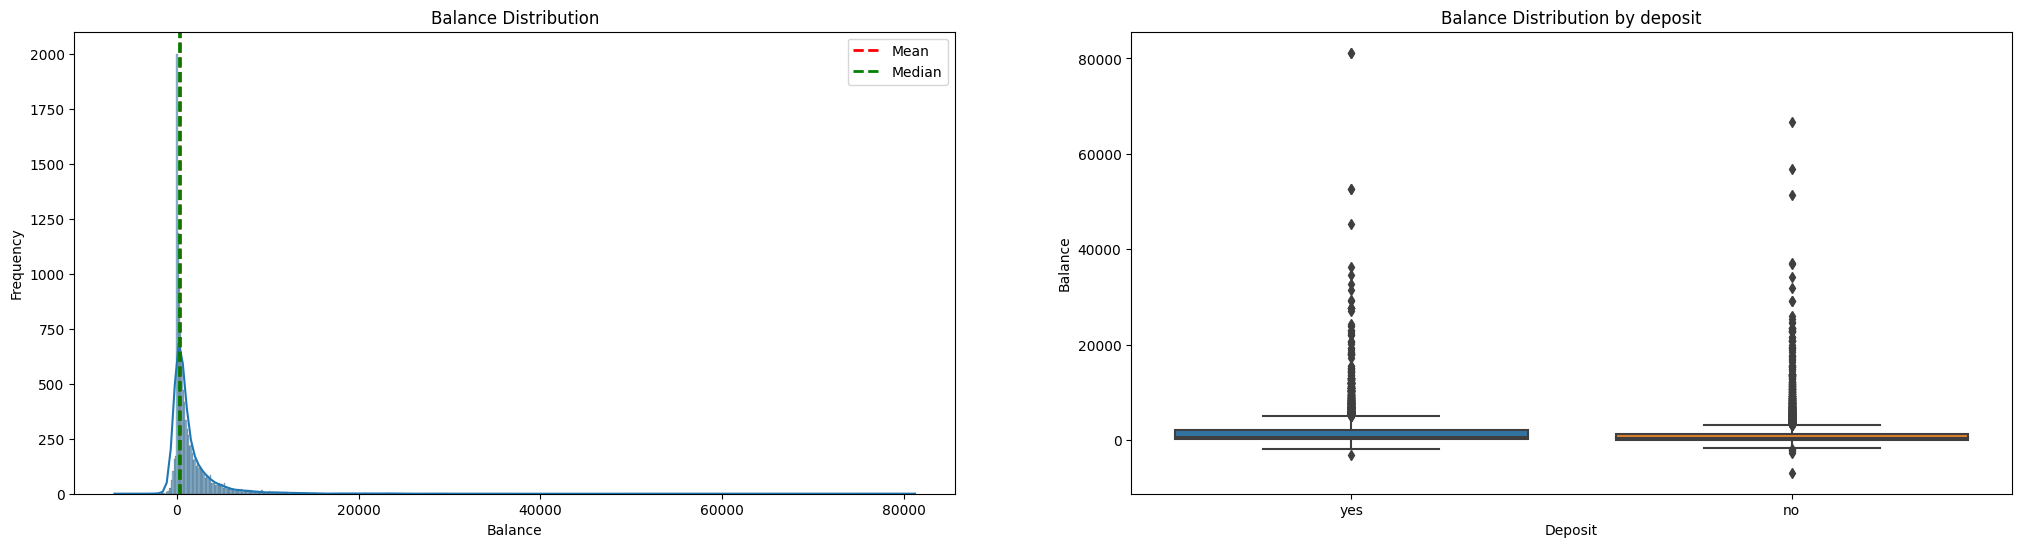

Skewness: 8.224619112755489
Minumum Balance: -6847
Maximum Balance: 81204
Maximum Balance: 1528.5385235620856


In [20]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='balance', data=data, kde=True)
plt.axvline(data.duration.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.duration.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='deposit', y='balance', data=data)
plt.title('Balance Distribution by deposit')
plt.xlabel('Deposit')
plt.ylabel('Balance')
plt.show()
print(f'Skewness: {data.balance.skew()}')
print(f'Minumum Balance: {data.balance.min()}')
print(f'Maximum Balance: {data.balance.max()}')
print(f'Maximum Balance: {data.balance.mean()}')

Data saldo custumer memiliki outlierse dengan distribusi yang skewed, Jika dilihat dari boxplot, rata" saldo custumer yang berlanggan hampir sama dengan custumer yang tidak berlanggangan.

## Data Preprocessing

Pada data preprocessing, data dibagi menjadi 3 yaitu data train, test, dan inference. Pada bab ini, juga dilakukan normalisasi data dengan scalling menggunakan minmaxscaler untuk data numerik dan encoding menggunakan algoritma ordinalscaler untuk data kategorik. Setelah itu, lakukan fiture selection menggunakan metode Anova. Terakhir set parameter untuk setiap pemodelan. Pada pemodelan, digunakan pipline untuk mempermudah pemodelan. 

**Split data train, test dan inference**

In [5]:
# Get Data for Model Inference
data_inf = data.sample(10, random_state =17)
data_inf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8636,42,technician,divorced,tertiary,no,802,no,no,telephone,28,jan,119,2,-1,0,unknown,no
7050,45,blue-collar,married,primary,no,-66,yes,no,unknown,6,may,263,2,-1,0,unknown,no
1522,60,management,married,tertiary,no,13546,no,no,cellular,17,apr,452,3,-1,0,unknown,yes
4823,54,unemployed,married,secondary,no,1561,no,no,cellular,25,may,352,3,186,2,failure,yes
3049,20,student,single,unknown,no,755,no,no,cellular,29,dec,284,1,-1,0,unknown,yes
6680,35,admin.,married,secondary,no,786,no,yes,cellular,25,jul,322,1,-1,0,unknown,no
7994,41,technician,married,tertiary,no,0,no,no,unknown,20,jun,95,1,-1,0,unknown,no
3504,78,retired,divorced,secondary,no,3417,no,no,cellular,12,may,309,1,181,1,success,yes
2602,57,management,divorced,unknown,no,854,no,no,cellular,27,aug,700,4,92,1,failure,yes
9631,56,management,married,tertiary,no,412,no,no,telephone,20,nov,179,6,-1,0,unknown,no


In [6]:
# Remove Inference -set from Dataset
data_train_test = data.drop(data_inf.index)

In [7]:
# Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)
data_inf.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,42,technician,divorced,tertiary,no,802,no,no,telephone,28,jan,119,2,-1,0,unknown,no
1,45,blue-collar,married,primary,no,-66,yes,no,unknown,6,may,263,2,-1,0,unknown,no
2,60,management,married,tertiary,no,13546,no,no,cellular,17,apr,452,3,-1,0,unknown,yes


In [8]:
# Splitting between 'X' and 'y'
X = data_train_test.drop(['deposit'], axis = 1)
y = data_train_test['deposit']

In [9]:
# Splitting between Train-set and Test-set
# Set 0.2 for 20% test-set and 80% train-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4,stratify=y)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (8921, 16)
Test Size :  (2231, 16)


**Fiture scaling dan Fiture Encoding**

In [10]:
#Buat kolom numerik dan kategorikal
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns: ', num_columns)
print('Categorical columns: ', cat_columns)

Numerical columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [11]:
# Split Train-set dan test-set based on column Types
#X_train
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

#X_test
X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

In [28]:
### Feature Scalling
#Definisikan scalling
scaler= MinMaxScaler()

# Fit scaler, hanya untuk X_train saja
scaler.fit(X_train_num)

#Transform X_train dan X_test
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [15]:
# definisikan encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# fir encoder, X-train saja
encoder.fit(X_train_cat)

# transform data X-train
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [31]:
# menggabungkan data numerik dan kategorik
X_train_ = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_ = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
#Buat dataframe
X_train_df = pd.DataFrame(X_train_, columns=[num_columns + cat_columns])
X_test_df = pd.DataFrame(X_test_, columns=[num_columns + cat_columns])
X_train_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,0.350649,0.066804,0.566667,0.037123,0.016129,0.000000,0.000000,9.0,1.0,1.0,0.0,0.0,0.0,2.0,6.0,3.0
1,0.610390,0.063896,0.666667,0.070637,0.000000,0.000000,0.000000,5.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
2,0.415584,0.096912,0.566667,0.104151,0.000000,0.214035,0.034483,4.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0
3,0.272727,0.041478,0.866667,0.047435,0.016129,0.000000,0.000000,9.0,1.0,2.0,0.0,0.0,0.0,1.0,8.0,3.0
4,0.324675,0.036292,0.866667,0.005929,0.290323,0.000000,0.000000,4.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,0.272727,0.056289,0.233333,0.081722,0.000000,0.431579,0.017241,9.0,2.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0
8917,0.142857,0.042392,0.033333,0.069090,0.000000,0.000000,0.000000,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0
8918,0.246753,0.080641,0.200000,0.057231,0.000000,0.000000,0.000000,4.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,3.0
8919,0.116883,0.043021,0.800000,0.060840,0.016129,0.216374,0.017241,1.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,2.0


In [32]:
ls_column = list(X_train)

**Fiture selection menggunakan Anova**

In [33]:
# instansiasi objek untuk anova
anova_fs = SelectKBest(score_func=f_classif,k='all')

In [34]:
# fitting ke data
anova_fs = anova_fs.fit(X_train_df, y_train)

df_anova_fs = pd.Series(data=anova_fs.scores_, index=ls_column).sort_values(ascending=False)

Text(0.5, 1.0, 'F-Score setiap atribut numerik terhadap Target')

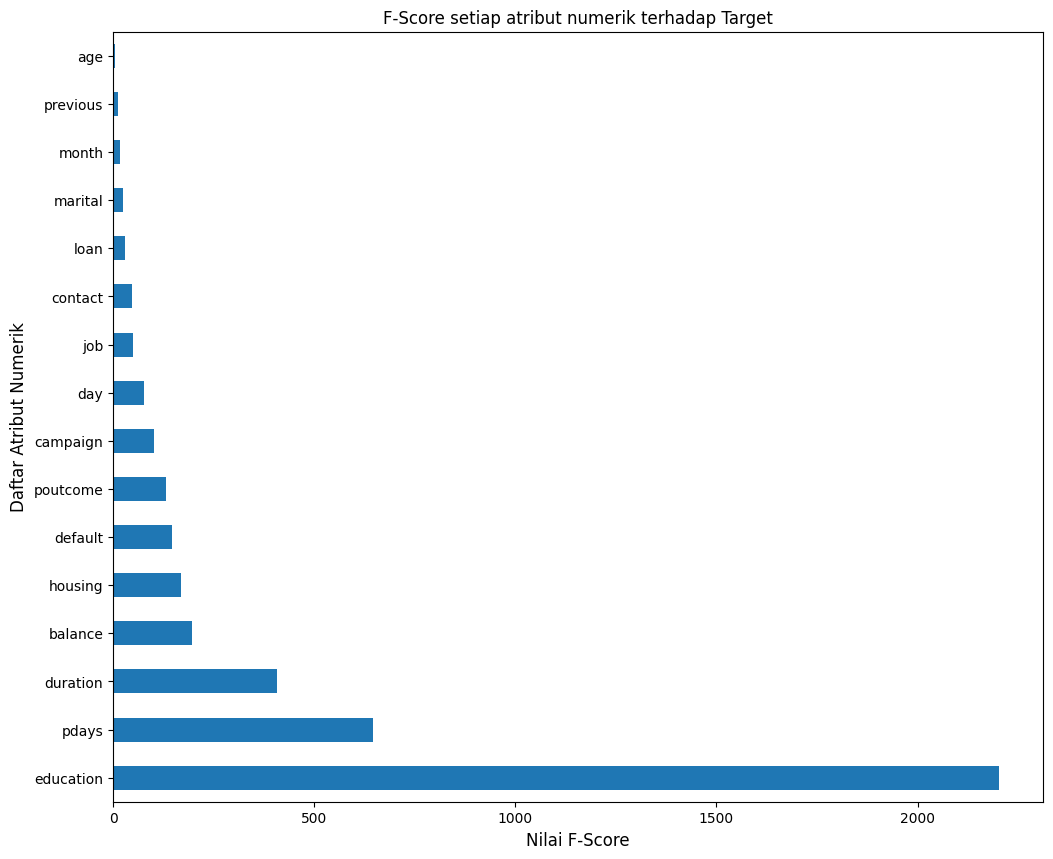

In [35]:
# Plotting score setiap atribut
plt.figure(figsize=(12,10))
df_anova_fs.plot(kind='barh')
plt.ylabel('Daftar Atribut Numerik', fontsize=12)
plt.xlabel('Nilai F-Score', fontsize=12)
plt.title('F-Score setiap atribut numerik terhadap Target',fontsize=12)

Hasil analisis menggunakan metode anova, didapatkan 'education', 'pdays', 'duration', 'balance', 'housing', 'default', dan 'poutcome' untuk fiture yang akan dipakai dalam pemodelan

In [36]:
#Display X_train
X_train_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,0.350649,0.066804,0.566667,0.037123,0.016129,0.000000,0.000000,9.0,1.0,1.0,0.0,0.0,0.0,2.0,6.0,3.0
1,0.610390,0.063896,0.666667,0.070637,0.000000,0.000000,0.000000,5.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
2,0.415584,0.096912,0.566667,0.104151,0.000000,0.214035,0.034483,4.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0
3,0.272727,0.041478,0.866667,0.047435,0.016129,0.000000,0.000000,9.0,1.0,2.0,0.0,0.0,0.0,1.0,8.0,3.0
4,0.324675,0.036292,0.866667,0.005929,0.290323,0.000000,0.000000,4.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,0.272727,0.056289,0.233333,0.081722,0.000000,0.431579,0.017241,9.0,2.0,1.0,0.0,1.0,0.0,0.0,8.0,0.0
8917,0.142857,0.042392,0.033333,0.069090,0.000000,0.000000,0.000000,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0
8918,0.246753,0.080641,0.200000,0.057231,0.000000,0.000000,0.000000,4.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,3.0
8919,0.116883,0.043021,0.800000,0.060840,0.016129,0.216374,0.017241,1.0,2.0,2.0,0.0,0.0,0.0,0.0,9.0,2.0


In [37]:
#Buat dataframe final dari hasil sekesi fitur
X_ = ['education', 'pdays', 'duration', 'balance', 'housing', 'default', 'poutcome']
X_train_final = X_train_df[X_]
X_test_final = X_test_df[X_]
X_train_final.head()

,education,pdays,duration,balance,housing,default,poutcome
0,1.0,0.000000,0.037123,0.066804,0.0,0.0,3.0
1,1.0,0.000000,0.070637,0.063896,0.0,0.0,3.0
2,2.0,0.214035,0.104151,0.096912,1.0,0.0,0.0
3,2.0,0.000000,0.047435,0.041478,0.0,0.0,3.0
4,2.0,0.000000,0.005929,0.036292,0.0,1.0,3.0


In [38]:
#Final Final Dataframe Train-Set
X_ = ['education', 'pdays', 'duration', 'balance', 'housing', 'default', 'poutcome']
X_train_final = X_train_df[X_]
X_test_final = X_test_df[X_]

In [39]:
num_cols_final = ['pdays', 'duration', 'balance']
cat_cols_final = ['education', 'housing', 'default', 'poutcome']

In [13]:
encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [40]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6563,45,technician,married,secondary,no,2571,no,no,unknown,18,jun,146,2,-1,0,unknown
2577,65,retired,married,secondary,no,2326,no,yes,cellular,21,aug,276,1,-1,0,unknown
3026,50,management,married,tertiary,no,5108,yes,no,cellular,18,dec,406,1,182,2,failure
8569,39,technician,married,tertiary,no,437,no,no,telephone,27,may,186,2,-1,0,unknown
6792,43,management,married,tertiary,yes,0,no,no,cellular,27,aug,25,19,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,39,technician,single,secondary,no,1685,yes,no,cellular,8,may,319,1,368,1,failure
6181,29,admin.,single,tertiary,no,514,no,no,cellular,2,feb,270,1,-1,0,unknown
2388,37,management,married,tertiary,no,3737,no,no,cellular,7,jul,224,1,-1,0,unknown
4776,27,blue-collar,single,tertiary,no,567,no,no,cellular,25,nov,238,2,184,1,success


Penulis akan membandingkan 7 performa model yang telah diset parameter dan dicrossvalidasi sebanyak 5 kali, hasil pemodelan terbaik akan diterapkan pada data inference.

In [41]:
#Definisi Model Pipline
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('classifier', LogisticRegression(random_state=17))])

# Support Vector Machine Pipeline
svc_pipe = Pipeline([('classifier', SVC(random_state=17))])

# Decision Tree Pipeline
tree_pipe = Pipeline([('classifier', DecisionTreeClassifier(random_state=17))])

# Random Forest Pipeline
forest_pipe = Pipeline([('classifier', RandomForestClassifier(random_state=17))])

# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('classifier', KNeighborsClassifier())])

# Naive Bayes Pipeline
naive_pipe = Pipeline([('classifier', GaussianNB())])


In [42]:
#Set Hyperparameter
# Logistic Regression
logistic_params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['liblinear', 'saga'],
                   'classifier__max_iter': [1000, 10000]}

# SVC
svc_params = {'classifier__C': [0.1, 1, 10], 
              'classifier__kernel': ['linear', 'rbf', 'poly'],
              'classifier__gamma': ['auto', 'scale']}

# Decision Tree
tree_params = {'classifier__criterion': ['gini', 'entropy'],
               'classifier__max_depth': [2, 3, 4, 5, 6], 
               'classifier__min_samples_split': [2, 3, 4, 5, 6],
               'classifier__min_samples_leaf': [2, 3, 4, 5, 6]}

# Random Forest
forest_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300]}

# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9, 11], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Naive Bayes
naive_params = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

## Model Definition

Proses tuning dilakukan menggunakan algoritma GridSearchCV

In [43]:
# Definisi Mosel
logistic = GridSearchCV(logistic_pipe, param_grid=logistic_params, cv=5, n_jobs=-1)
svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1)
tree = GridSearchCV(tree_pipe, param_grid=tree_params, cv=5, n_jobs=-1)
forest = GridSearchCV(forest_pipe, param_grid=forest_params, cv=5, n_jobs=-1)
knn = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, n_jobs=-1)
naive = GridSearchCV(naive_pipe, param_grid=naive_params, cv=5, n_jobs=-1)

## Model Training

In [44]:
%timeit logistic.fit(X_train_final, y_train)
%timeit svc.fit(X_train_final, y_train)
%timeit tree.fit(X_train_final, y_train)
%timeit forest.fit(X_train_final, y_train)
%timeit knn.fit(X_train_final, y_train)
%timeit naive.fit(X_train_final, y_train)

3.81 s ± 449 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 6s ± 3.49 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.59 s ± 76.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_

1min 13s ± 1.18 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.28 s ± 426 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
329 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
# Mencari best parameter
best_logistic = logistic.best_estimator_
print('-------Logistic Regression Best Hyperparameter-------')
print(logistic.best_params_)

best_svc = svc.best_estimator_
print('\n-------Support Vector Machine Best Hyperparameter-------')
print(svc.best_params_)

best_tree = tree.best_estimator_
print('\n-------Decision Tree Best Hyperparameter-------')
print(tree.best_params_)

best_forest = forest.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(forest.best_params_)

best_knn = knn.best_estimator_
print('\n-------K-Nearest Neighbors Best Hyperparameter-------')
print(knn.best_params_)

best_naive = naive.best_estimator_
print('\n-------Naive Bayes Best Hyperparameter-------')
print(naive.best_params_)

-------Logistic Regression Best Hyperparameter-------
{'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

-------Support Vector Machine Best Hyperparameter-------
{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

-------Decision Tree Best Hyperparameter-------
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}

-------Random Forest Best Hyperparameter-------
{'classifier__criterion': 'entropy', 'classifier__max_features': 'auto', 'classifier__n_estimators': 150}

-------K-Nearest Neighbors Best Hyperparameter-------
{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}

-------Naive Bayes Best Hyperparameter-------
{'classifier__var_smoothing': 0.001}


## Model Evaluasi

Metrics yang digunakan pada evaluasi model adalah confusion matrix dan recall. 

In [46]:
#Buat dataframe evaluation
evaluations = pd.DataFrame(columns=['model', 'training_score', 'test_score'])

In [47]:
evaluations.loc[0] = ['Logistic Regression', round(tree.score(X_train_final, y_train), 3), round(tree.score(X_test_final, y_test), 3)]
evaluations.loc[1] = ['SVM', round(svc.score(X_train_final, y_train), 3), round(svc.score(X_test_final, y_test), 3)]
evaluations.loc[2] = ['Decision Tree', round(tree.score(X_train_final, y_train), 3), round(tree.score(X_test_final, y_test), 3)]
evaluations.loc[3] = ['Random Forest', round(forest.score(X_train_final, y_train), 3), round(forest.score(X_test_final, y_test), 3)]
evaluations.loc[4] = ['KNN', round(knn.score(X_train_final, y_train), 3), round(knn.score(X_test_final, y_test), 3)]
evaluations.loc[5] = ['Naive Bayes', round(naive.score(X_train_final, y_train), 3), round(naive.score(X_test_final, y_test),3)]

In [48]:
#Confusion Metrics
confusions = [confusion_matrix(y_test, logistic.predict(X_test_final)),
              confusion_matrix(y_test, svc.predict(X_test_final)),
              confusion_matrix(y_test, tree.predict(X_test_final)),
              confusion_matrix(y_test, forest.predict(X_test_final)),
              confusion_matrix(y_test, knn.predict(X_test_final)),
              confusion_matrix(y_test, naive.predict(X_test_final))]

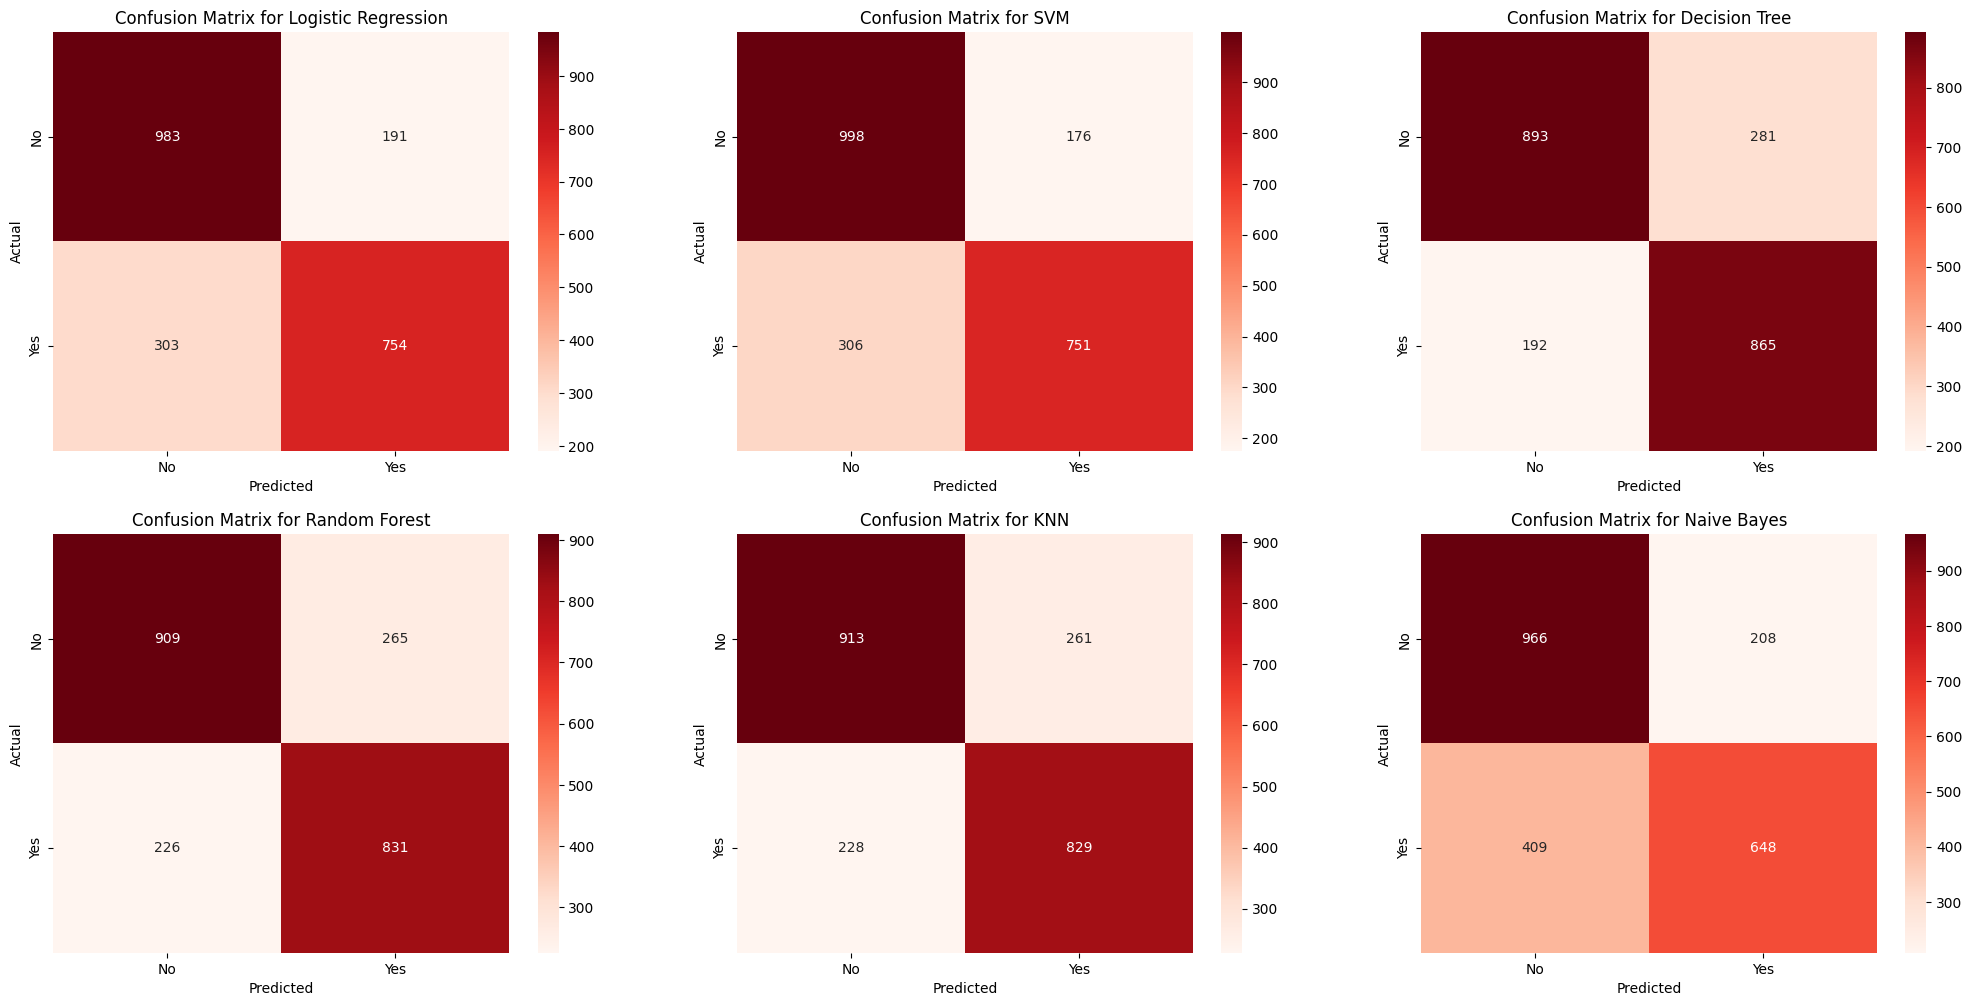

In [49]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix for {evaluations.iloc[i, 0]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

- Logistic Regressin : Ada 303 custumer yang diprediksi tidak berlangganan, padahal sebenarnya berlangganan.
- SVM : Sebenyak 302 customer yang diprediksi tidak berlanggangan yang sebenarnya berlangganan.
- Decision Tree : Ada 192 custumer yang diprediksi tidak berlangganan, namun nyatanya custumer tersebut berlanggannan.
- Random Forest : Model ini memprediksi 226 custumer tidak berlangganan yang sebenarnya berlangganan.
- KNN : 228 custumer diprediksi tidak berlangganan yang nyatanya telah berlanngganan.
- Naive bayes : Model ini memprediksi 409 customer tidak berlanggan pada program bank, yang seharusnya berlangganan.

Dari total jumlah false negatif pada setiap model, model terbaik adalah model decision treee dengan jumlah false negatif minimum.


In [50]:
# Logistic Regression
print("train_log", classification_report(y_train, logistic.predict(X_train_final)))
print("testlog", classification_report(y_test, logistic.predict(X_test_final)))

train_log               precision    recall  f1-score   support

          no       0.76      0.82      0.79      4694
         yes       0.78      0.71      0.74      4227

    accuracy                           0.77      8921
   macro avg       0.77      0.76      0.77      8921
weighted avg       0.77      0.77      0.77      8921

testlog               precision    recall  f1-score   support

          no       0.76      0.84      0.80      1174
         yes       0.80      0.71      0.75      1057

    accuracy                           0.78      2231
   macro avg       0.78      0.78      0.78      2231
weighted avg       0.78      0.78      0.78      2231



Berdasarkan recall dari train set (0.71) dan test set (0.71), performa model logistic regression cukup baik meskipun performa modelnya tidaklah tinggi, namun tidak ada perbedaaan antara performa data train dan data test.

In [51]:
# Support Vector Machine
print("train_svm", classification_report(y_train, svc.predict(X_train_final)))
print("test_svm", classification_report(y_test, svc.predict(X_test_final)))

train_svm               precision    recall  f1-score   support

          no       0.77      0.84      0.80      4694
         yes       0.80      0.71      0.76      4227

    accuracy                           0.78      8921
   macro avg       0.78      0.78      0.78      8921
weighted avg       0.78      0.78      0.78      8921

test_svm               precision    recall  f1-score   support

          no       0.77      0.85      0.81      1174
         yes       0.81      0.71      0.76      1057

    accuracy                           0.78      2231
   macro avg       0.79      0.78      0.78      2231
weighted avg       0.79      0.78      0.78      2231



Berdasarkan recall dari train set (0.71) dan test set (0.71), performa model svm cukup baik meskipun performa modelnya tidaklah tinggi, namun tidak ada perbedaaan antara performa data train dan data test.

In [52]:
# Decision Tree
print("train_tree", classification_report(y_train, tree.predict(X_train_final)))
print("test_tree", classification_report(y_test, tree.predict(X_test_final)))

train_tree               precision    recall  f1-score   support

          no       0.83      0.77      0.80      4694
         yes       0.76      0.83      0.80      4227

    accuracy                           0.80      8921
   macro avg       0.80      0.80      0.80      8921
weighted avg       0.80      0.80      0.80      8921

test_tree               precision    recall  f1-score   support

          no       0.82      0.76      0.79      1174
         yes       0.75      0.82      0.79      1057

    accuracy                           0.79      2231
   macro avg       0.79      0.79      0.79      2231
weighted avg       0.79      0.79      0.79      2231



Berdasarkan recall dari train set (0.83) dan test set (0.82), performa model decision tree sudah baik meskipun ada perbedaan performa sekita (0.01), namun performanya sudah cukup tinggi.

In [53]:
# Random Forest
print("train_forest", classification_report(y_train, forest.predict(X_train_final)))
print("test_forest", classification_report(y_test, forest.predict(X_test_final)))

train_forest               precision    recall  f1-score   support

          no       1.00      1.00      1.00      4694
         yes       1.00      1.00      1.00      4227

    accuracy                           1.00      8921
   macro avg       1.00      1.00      1.00      8921
weighted avg       1.00      1.00      1.00      8921

test_forest               precision    recall  f1-score   support

          no       0.80      0.77      0.79      1174
         yes       0.76      0.79      0.77      1057

    accuracy                           0.78      2231
   macro avg       0.78      0.78      0.78      2231
weighted avg       0.78      0.78      0.78      2231



Performa model untuk data train sangat bagus namun menurun drastis pada data test. Hal ini membuat model tergolong overfit.

In [54]:
#KNN
print("train_knn", classification_report(y_train, knn.predict(X_train_final)))
print("test_knn", classification_report(y_test, knn.predict(X_test_final)))

train_knn               precision    recall  f1-score   support

          no       0.83      0.81      0.82      4694
         yes       0.79      0.81      0.80      4227

    accuracy                           0.81      8921
   macro avg       0.81      0.81      0.81      8921
weighted avg       0.81      0.81      0.81      8921

test_knn               precision    recall  f1-score   support

          no       0.80      0.78      0.79      1174
         yes       0.76      0.78      0.77      1057

    accuracy                           0.78      2231
   macro avg       0.78      0.78      0.78      2231
weighted avg       0.78      0.78      0.78      2231



Berdasarkan recall dari train set (0.81) dan test set (0.78), performa model decision tree pada data train sudah bagus namun mengalami penurunan performa pada penerapan data test.

In [55]:
#Naive Bayes
print("train_naive", classification_report(y_train, naive.predict(X_train_final)))
print("test_naive", classification_report(y_test, naive.predict(X_test_final)))

train_naive               precision    recall  f1-score   support

          no       0.70      0.80      0.75      4694
         yes       0.74      0.62      0.67      4227

    accuracy                           0.71      8921
   macro avg       0.72      0.71      0.71      8921
weighted avg       0.72      0.71      0.71      8921

test_naive               precision    recall  f1-score   support

          no       0.70      0.82      0.76      1174
         yes       0.76      0.61      0.68      1057

    accuracy                           0.72      2231
   macro avg       0.73      0.72      0.72      2231
weighted avg       0.73      0.72      0.72      2231



Berdasarkan recall dari train set (0.62) dan test set (0.61), performa model naive bayes pada data train dan data test cukup rendah, shingga model ini tergolong underfit.

Berdasarkan evaluasi menggunakn confussion metrics dan recall, didapatkan model terbaik adalah model decision tree. Model ini akan diterapkan pada data inference.

## Model Saving

In [77]:
tree

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=17))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [2, 3, 4, 5, 6],
                         'classifier__min_samples_leaf': [2, 3, 4, 5, 6],
                         'classifier__min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
with open('model_encoder.pkl','wb') as file_3:
  joblib.dump(encoder, file_3)

In [74]:
#Save files
with open('model_tree.pkl', 'wb') as file_1:
  joblib.dump(tree, file_1)
  
with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl','wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num_cols.txt','w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)
  
with open('list_X_final.txt', 'w') as file_6:
  json.dump(X_, file_6)

In [76]:

#Load all files
with open('model_tree.pkl', 'rb') as file_1:
  model_tree = joblib.load(file_1)
  
with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num_cols.txt','r') as file_4:
  list_num_cols = json.load(file_4)
  
with open('list_cat_cols.txt','r') as file_5:
  list_cat_cols = json.load(file_5)

with open('list_X_final.txt', 'r') as file_6:
  list_X_final = json.load(file_6)


## Model Inference

In [78]:
# Display Inference set
data_inf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,42,technician,divorced,tertiary,no,802,no,no,telephone,28,jan,119,2,-1,0,unknown,no
1,45,blue-collar,married,primary,no,-66,yes,no,unknown,6,may,263,2,-1,0,unknown,no
2,60,management,married,tertiary,no,13546,no,no,cellular,17,apr,452,3,-1,0,unknown,yes
3,54,unemployed,married,secondary,no,1561,no,no,cellular,25,may,352,3,186,2,failure,yes
4,20,student,single,unknown,no,755,no,no,cellular,29,dec,284,1,-1,0,unknown,yes
5,35,admin.,married,secondary,no,786,no,yes,cellular,25,jul,322,1,-1,0,unknown,no
6,41,technician,married,tertiary,no,0,no,no,unknown,20,jun,95,1,-1,0,unknown,no
7,78,retired,divorced,secondary,no,3417,no,no,cellular,12,may,309,1,181,1,success,yes
8,57,management,divorced,unknown,no,854,no,no,cellular,27,aug,700,4,92,1,failure,yes
9,56,management,married,tertiary,no,412,no,no,telephone,20,nov,179,6,-1,0,unknown,no


In [79]:
#Split between numerical columns and categorical columns
X_inf_num = data_inf[list_num_cols]
X_inf_cat = data_inf[list_cat_cols]

In [80]:
#Transform X_train dan X_test
X_inf_scaled = model_scaler.transform(X_inf_num)
X_inf_encoded = model_encoder.transform(X_inf_cat)

In [81]:
# menggabungkan data numerik dan kategorik
X_inf_ = np.concatenate([X_inf_scaled, X_inf_encoded], axis=1)
#Buat dataframe
X_inf_df = pd.DataFrame(X_inf_, columns=[list_num_cols + list_cat_cols])
X_inf_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,0.311688,0.045809,0.900000,0.030162,0.016129,0.000000,0.000000,9.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,3.0
1,0.350649,0.035508,0.166667,0.067285,0.016129,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,2.0,8.0,3.0
2,0.545455,0.197052,0.533333,0.116009,0.032258,0.000000,0.000000,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.467532,0.054817,0.800000,0.090229,0.032258,0.218713,0.034483,10.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0
4,0.025974,0.045252,0.933333,0.072699,0.000000,0.000000,0.000000,8.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0
5,0.220779,0.045620,0.800000,0.082495,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,3.0
6,0.298701,0.036292,0.633333,0.023975,0.000000,0.000000,0.000000,9.0,1.0,2.0,0.0,0.0,0.0,2.0,6.0,3.0
7,0.779221,0.076844,0.366667,0.079144,0.000000,0.212865,0.017241,5.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2.0
8,0.506494,0.046427,0.866667,0.179943,0.048387,0.108772,0.017241,4.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.493506,0.041181,0.633333,0.045630,0.080645,0.000000,0.000000,4.0,1.0,2.0,0.0,0.0,0.0,1.0,9.0,3.0


In [82]:
X_inf_final = X_inf_df[list_X_final]

In [83]:
# Predict Using Decision Tree Model
y_pred_tree = model_tree.predict(X_inf_final)
y_pred_tree

array(['no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
      dtype=object)

In [84]:
# Creat Data Frame
y_pred_tree_df = pd.DataFrame(y_pred_tree, columns=['deposit_tree'])
y_pred_tree_df

,deposit_tree
0,no
1,no
2,yes
3,yes
4,yes
5,yes
6,no
7,yes
8,yes
9,yes


In [85]:
# concate dataset dan price_prediction
data_inf_predic= pd.concat([data_inf, y_pred_tree_df], axis =1)
data_inf_predic[["deposit", "deposit_tree"]]

,deposit,deposit_tree
0,no,no
1,no,no
2,yes,yes
3,yes,yes
4,yes,yes
5,no,yes
6,no,no
7,yes,yes
8,yes,yes
9,no,yes


Pada penerapan model terhadap data inference, data berhasil memprediksi dengan benar semua customer yang berlangganan pada proram bank, dan salah memprediksi 2 data customer yang tidak berlangganan.

In [86]:
# Decision Tree
print("train_tree", classification_report(data_inf['deposit'], tree.predict(X_inf_final)))

train_tree               precision    recall  f1-score   support

          no       1.00      0.60      0.75         5
         yes       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



Berdasrkan score recall, performa model dalam memprediksi data customer yang berlangganan adalah 100%, namun performa model untuk data customer yang tidak berlangganan hanya 60%.

## Kesimpulan

**Exploratory Data Analysis** 

- Data deposit customer menunjukkan jumlah data customer yang melakukan deposit hampir seimbang dengan jumlah customer yang tidak melakukan deposit, meskipun jumlah customer yang tidak melakukan pembayaran deposit, namun selisihnya tidak jauh berbeda.
- Mayoritas customer suatu bank berstatus "married" dengan persentase sebesar 56,9%, setelah itu disusul dengan custumer yang berstaus tinggal dengan persentase 31,5% dan status divorced sebesar 11,6%.
- 5 pekerjaan teratas customer dari bank ini adalah management, blue-collar, technician, admin dan services.
- Kebanyakan custumer memiliki tingkat pendidikan 'secondary', kemudian, tertiary, primary, dan terakhir tidak diketahui.
- Dataset menunjukkan bahwa mayoritas customer tidak memiliki riwayat default dalam membayar tagihan kartu kredit. Jumlah customer yang gagal bayar dan tidak gagal bayar jauh berbeda.
- Seperti yang kita tahu data deposit cukup balanced dan data housing loan juga cukup balanced, sehingga lebih mudah untuk mengetahui hubungan antara housing dan deposit. Customer yang memiliki cicilan rumah cenderung tidak berlanggangan.
- Dataset menunjukkan customer didominasi oleh customer yang tidak memiliki pinjamana pribadi. Dataset juga menunjukkan ketidakseimbangan data pada kolom **loan**.
- Jumlah customer yang **berlangganan** dan **tidak berlanggangan** **cukup seimbang** pada **usia 30 hingga 50 tahun**.  
- Duration merupakan durasi yang dibutuhkan pihak bank menghubungi customer dalam satuan detik. Jika kita lihat hasil boxplot, dapat diketahui bahwa custumer yang memiliki durasi yang lama saat dihubungi oleh pihak bank cenderung akan melakukan deporit. Meskipun ada beberapa custumer yang durasinya lama tapi tidak melakukan deposit. 
- Rata" custumer memutuskan untuk berlangganan sejak dihubungi oleh pihak bank hingga sekitar 120 hari. Namun ada beberapa klien yang membutuhkan waktu lebih lama untuk berlanggangan. 

**Modeling**
Pada pemodelan digunakan 7 model yang telah di set parameternya dan lakukan tuning cross validasi. Hasil evaluasi menunjukkan model terbaik adalah model decision tree. Hal ini didasarkan pada jumlah false negatif minimum dan recall score pada tiap model. Recall score model decision tree pada data train yaitu 0.83 dan 0.82 pada data test. Score ini cukup tinggi, sehingga dapat digolongkan model goodfit. Pada penerapan data inference, model ini mampu memprediksi dengan baik jumlah data customer yang berhasil berlangganan dengan perfoma 100 persen, namun performa model untuk data customer yang tidak berlangganan hanya 60 persen.

Analisis performa kampanye pemasaran bank dan identifikasi pola untuk mengembangkan strategi masa depan.
analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

